In [ ]:
import pandas as pd
import numpy as np
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler

In [ ]:
price_df = pd.read_csv('/content/drive/MyDrive/filtered_price.csv')
news_df = pd.read_csv('/content/drive/MyDrive/price_news_return_embedding.csv')

news_df['1_day_return_positive'] = news_df['1_day_return'].apply(lambda x: 1 if x > 0 else 0)
news_df['2_day_return_positive'] = news_df['2_day_return'].apply(lambda x: 1 if x > 0 else 0)
news_df['3_day_return_positive'] = news_df['3_day_return'].apply(lambda x: 1 if x > 0 else 0)
news_df['4_day_return_positive'] = news_df['4_day_return'].apply(lambda x: 1 if x > 0 else 0)
news_df['7_day_return_positive'] = news_df['7_day_return'].apply(lambda x: 1 if x > 0 else 0)
news_df['10_day_return_positive'] = news_df['10_day_return'].apply(lambda x: 1 if x > 0 else 0)
news_df['30_day_return_positive'] = news_df['30_day_return'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
news_df = news_df.sort_values(by='Date')

In [ ]:
# Splitting the data into train and test sets
test_idx = int(len(news_df) * 0.8)
train_df = news_df[:test_idx]
test_df = news_df[test_idx:]

X_train = np.array([np.fromstring(record.strip('[]'), sep=',') for record in train_df['Concatenated_News_Embedding']])
X_test = np.array([np.fromstring(record.strip('[]'), sep=',') for record in test_df['Concatenated_News_Embedding']])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7036, 1536)
(1759, 1536)


In [ ]:
y_train_1 = np.array(train_df['1_day_return_positive'])
y_test_1 = np.array(test_df['1_day_return_positive'])

y_train_10 = np.array(train_df['10_day_return_positive'])
y_test_10 = np.array(test_df['10_day_return_positive'])

# Feed Forward

In [ ]:
model_1 = Sequential([
    # Input layer & first dense layer
    Dense(1024, input_dim=1536, kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.3),


    Dense(2048, kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.3),


    Dense(512, kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.3),


    Dense(256, kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Output layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              1573888   
                                                                 
 activation_3 (Activation)   (None, 1024)              0         
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 2048)              2099200   
                                                                 
 activation_4 (Activation)   (None, 2048)              0         
                                                      

In [ ]:
history_1 = model_1.fit(X_train, y_train_1, epochs=40, batch_size=50, validation_data=(X_test, y_test_1))

# Evaluate the model
loss, accuracy = model_1.evaluate(X_test, y_test_1)
print(f'Accuracy: {accuracy}')

# Predict the labels of the test set
y_prob_1 = model_1.predict(X_test)

Epoch 1/40
159/159 [==============================] - 2s 11ms/step - loss: 0.8581 - accuracy: 0.5090 - val_loss: 1.0267 - val_accuracy: 0.5017
Epoch 2/40
159/159 [==============================] - 2s 10ms/step - loss: 0.9099 - accuracy: 0.5121 - val_loss: 0.9742 - val_accuracy: 0.5256
Epoch 3/40
159/159 [==============================] - 1s 9ms/step - loss: 0.8886 - accuracy: 0.5042 - val_loss: 0.8923 - val_accuracy: 0.4949
Epoch 4/40
159/159 [==============================] - 2s 11ms/step - loss: 0.8704 - accuracy: 0.5088 - val_loss: 0.8956 - val_accuracy: 0.5006
Epoch 5/40
159/159 [==============================] - 2s 13ms/step - loss: 0.8839 - accuracy: 0.5023 - val_loss: 0.8927 - val_accuracy: 0.4767
Epoch 6/40
159/159 [==============================] - 3s 17ms/step - loss: 0.8953 - accuracy: 0.5059 - val_loss: 0.9307 - val_accuracy: 0.4812
Epoch 7/40
159/159 [==============================] - 2s 15ms/step - loss: 0.8705 - accuracy: 0.5092 - val_loss: 0.8387 - val_accuracy: 0.4983


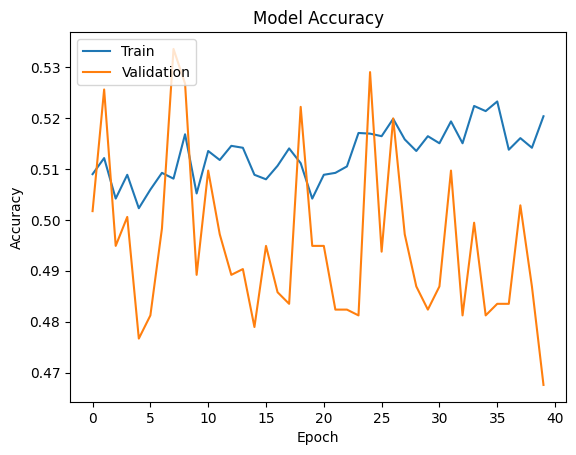

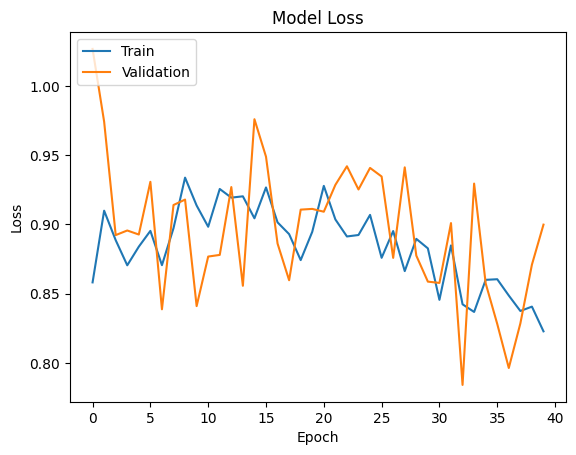

In [ ]:
# Summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

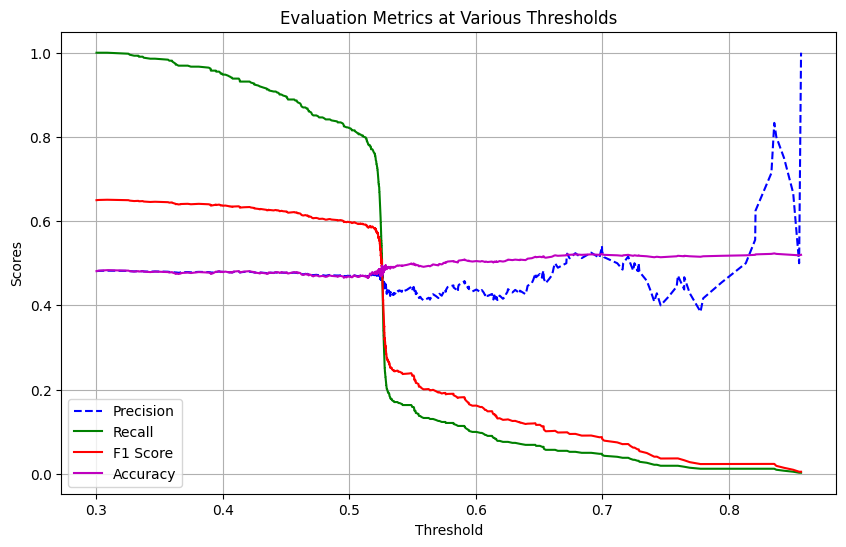

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test_1, y_prob_1)

accuracies = []

# Calculate F1 scores and accuracy for each threshold
f1_scores = []
for threshold in thresholds:
    y_pred_1 = (y_prob_1 >= threshold).astype(int)
    f1_scores.append(f1_score(y_test_1, y_pred_1))
    accuracies.append(accuracy_score(y_test_1, y_pred_1))

# Plotting the precision, recall, F1-score, and accuracy as functions of the threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores, 'r-', label='F1 Score')
plt.plot(thresholds, accuracies, 'm-', label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Scores')
plt.title('Evaluation Metrics at Various Thresholds')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
y_pred_binary_1 = np.where(y_prob_1 > 0.54, 1, 0)

print('Classification Report:')
print(classification_report(y_test_1, y_pred_binary_1))

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.80      0.62       456
           1       0.43      0.17      0.24       423

    accuracy                           0.49       879
   macro avg       0.47      0.48      0.43       879
weighted avg       0.47      0.49      0.44       879



In [ ]:
model_10 = Sequential([
    # Input layer & first dense layer
    Dense(1024, input_dim=1536, kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.3),


    Dense(2048, kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.3),


    Dense(512, kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.3),


    Dense(256, kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Output layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model_10.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model_10.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1024)              1573888   
                                                                 
 activation_7 (Activation)   (None, 1024)              0         
                                                                 
 batch_normalization_4 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 2048)              2099200   
                                                                 
 activation_8 (Activation)   (None, 2048)              0         
                                                      

In [ ]:
history_10 = model_10.fit(X_train, y_train_10, epochs=40, batch_size=50, validation_data=(X_test, y_test_10))

# Evaluate the model
loss, accuracy = model_10.evaluate(X_test, y_test_10)
print(f'Accuracy: {accuracy}')

# Predict the labels of the test set
y_prob_10 = model_10.predict(X_test)

Epoch 1/40
159/159 [==============================] - 5s 11ms/step - loss: 41.1866 - accuracy: 0.5179 - val_loss: 15.5216 - val_accuracy: 0.5461
Epoch 2/40
159/159 [==============================] - 1s 9ms/step - loss: 7.2610 - accuracy: 0.5301 - val_loss: 2.7043 - val_accuracy: 0.5631
Epoch 3/40
159/159 [==============================] - 2s 12ms/step - loss: 1.7471 - accuracy: 0.5330 - val_loss: 1.1851 - val_accuracy: 0.5666
Epoch 4/40
159/159 [==============================] - 2s 13ms/step - loss: 1.0550 - accuracy: 0.5335 - val_loss: 0.9383 - val_accuracy: 0.5700
Epoch 5/40
159/159 [==============================] - 2s 11ms/step - loss: 0.9248 - accuracy: 0.5316 - val_loss: 0.8768 - val_accuracy: 0.5893
Epoch 6/40
159/159 [==============================] - 1s 9ms/step - loss: 0.8634 - accuracy: 0.5403 - val_loss: 0.8288 - val_accuracy: 0.5654
Epoch 7/40
159/159 [==============================] - 2s 13ms/step - loss: 0.8328 - accuracy: 0.5419 - val_loss: 0.8331 - val_accuracy: 0.5290

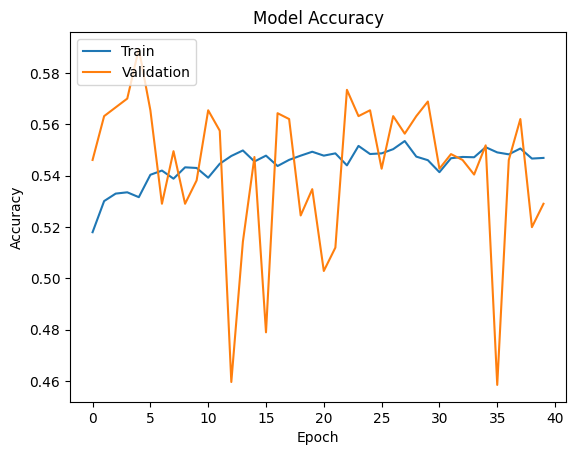

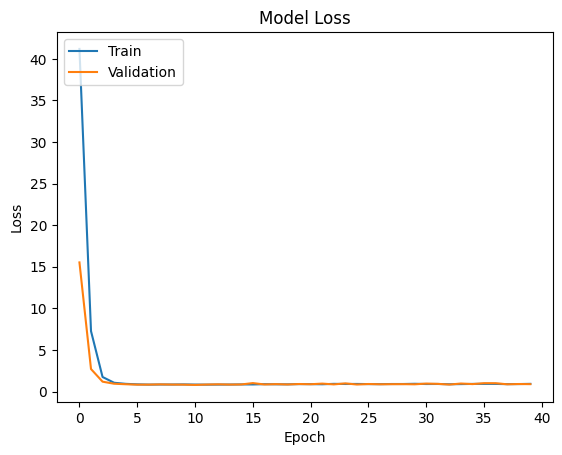

In [ ]:
# Summarize history for accuracy
plt.plot(history_10.history['accuracy'])
plt.plot(history_10.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history_10.history['loss'])
plt.plot(history_10.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

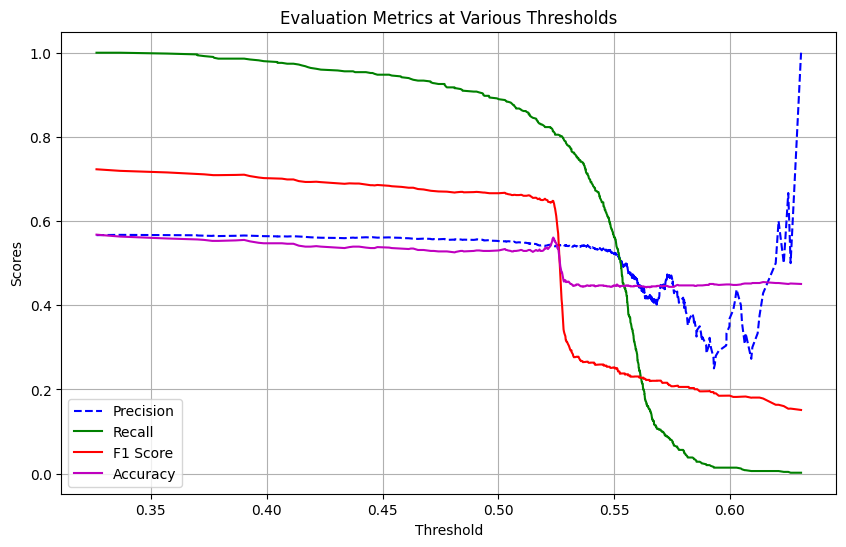

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test_10, y_prob_10)

accuracies = []

# Calculate F1 scores and accuracy for each threshold
f1_scores = []
for threshold in thresholds:
    y_pred_10 = (y_prob_1 >= threshold).astype(int)
    f1_scores.append(f1_score(y_test_10, y_pred_10))
    accuracies.append(accuracy_score(y_test_10, y_pred_10))

# Plotting the precision, recall, F1-score, and accuracy as functions of the threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores, 'r-', label='F1 Score')
plt.plot(thresholds, accuracies, 'm-', label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Scores')
plt.title('Evaluation Metrics at Various Thresholds')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
y_pred_binary_10 = np.where(y_prob_10 > 0.515, 1, 0)

print('Classification Report:')
print(classification_report(y_test_10, y_pred_binary_10))

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.08      0.13       381
           1       0.55      0.84      0.66       498

    accuracy                           0.51       879
   macro avg       0.41      0.46      0.39       879
weighted avg       0.43      0.51      0.43       879



#LSTM

In [ ]:
def create_sequences(X, y, window_size):
    X_seqs = []
    y_labels = []
    for i in range(len(X) - window_size):
        X_seq = X[i:i + window_size]  # Create a window of features
        y_label = y[i + window_size]  # Get the label corresponding to the end of the window
        X_seqs.append(X_seq)
        y_labels.append(y_label)
    return np.array(X_seqs), np.array(y_labels)

In [ ]:
window_size = 30
#X_train, y_train_1 = create_sequences(X_train, y_train_1, window_size)
#X_test, y_test_1 = create_sequences(X_test, y_test_1, window_size)

X_train, y_train_10 = create_sequences(X_train, y_train_10, window_size)
X_test, y_test_10 = create_sequences(X_test, y_test_10, window_size)

In [ ]:
print("X_train shape:", X_train.shape)  # Should show 80% of your samples
print("X_test shape:", X_test.shape)   # Should show the remaining 20%
print("y_train shape:", y_train_10.shape) # Corresponding 80% labels
print("y_test shape:", y_test_10.shape)   # Remaining 20% labels

X_train shape: (7006, 30, 1536)
X_test shape: (1729, 30, 1536)
y_train shape: (7006,)
y_test shape: (1729,)


In [ ]:
lstm = Sequential([
    LSTM(256, input_shape=(30, 1536), return_sequences=True, kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    BatchNormalization(),

    LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    BatchNormalization(),

    LSTM(64, return_sequences=False, kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    BatchNormalization(),

    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    BatchNormalization(),

    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),

    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),

    Dense(1, activation='sigmoid')
])

# Compile the model
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 256)           1836032   
                                                                 
 dropout (Dropout)           (None, 30, 256)           0         
                                                                 
 batch_normalization (Batch  (None, 30, 256)           1024      
 Normalization)                                                  
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           197120    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 batch_normalization_1 (Bat  (None, 30, 128)           512       
 chNormalization)                                       

In [ ]:
history = lstm.fit(X_train, y_train_10, epochs=30, batch_size=100, validation_data=(X_test, y_test_10))

# Evaluate the model
loss, accuracy = lstm.evaluate(X_test, y_test_10)
print(f'Accuracy: {accuracy}')

Epoch 1/30
71/71 [==============================] - 22s 85ms/step - loss: 14.0918 - accuracy: 0.5802 - val_loss: 8.7988 - val_accuracy: 0.5749
Epoch 2/30
71/71 [==============================] - 3s 42ms/step - loss: 6.6136 - accuracy: 0.6366 - val_loss: 4.8077 - val_accuracy: 0.4933
Epoch 3/30
71/71 [==============================] - 3s 36ms/step - loss: 3.7851 - accuracy: 0.6503 - val_loss: 3.0423 - val_accuracy: 0.5639
Epoch 4/30
71/71 [==============================] - 3s 37ms/step - loss: 2.7797 - accuracy: 0.6444 - val_loss: 2.3809 - val_accuracy: 0.5061
Epoch 5/30
71/71 [==============================] - 3s 37ms/step - loss: 2.0134 - accuracy: 0.6767 - val_loss: 1.8360 - val_accuracy: 0.4633
Epoch 6/30
71/71 [==============================] - 4s 51ms/step - loss: 1.5501 - accuracy: 0.6756 - val_loss: 1.5267 - val_accuracy: 0.3973
Epoch 7/30
71/71 [==============================] - 3s 39ms/step - loss: 1.3007 - accuracy: 0.6721 - val_loss: 1.3000 - val_accuracy: 0.4274
Epoch 8/30


In [ ]:
y_prob = lstm.predict(X_test)

55/55 [==============================] - 2s 8ms/step


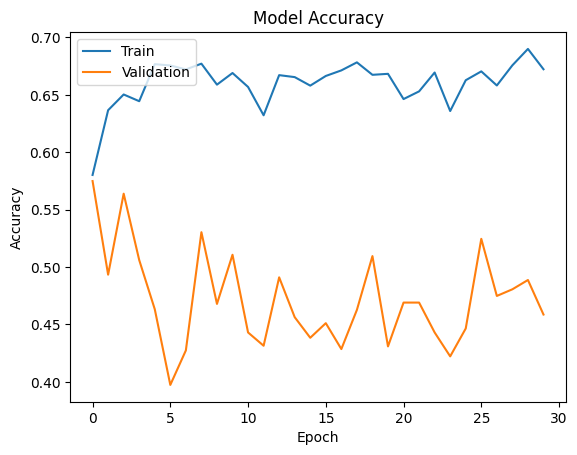

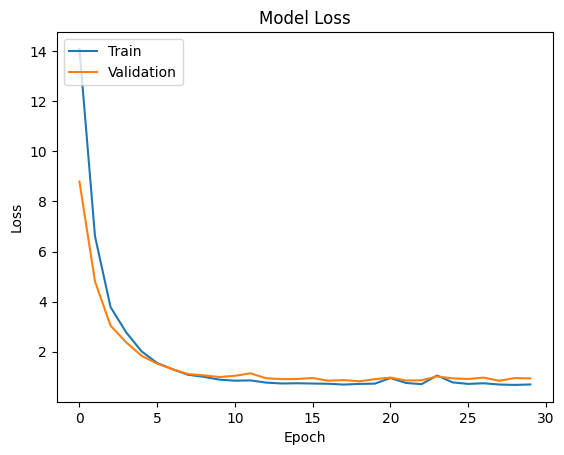

In [ ]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

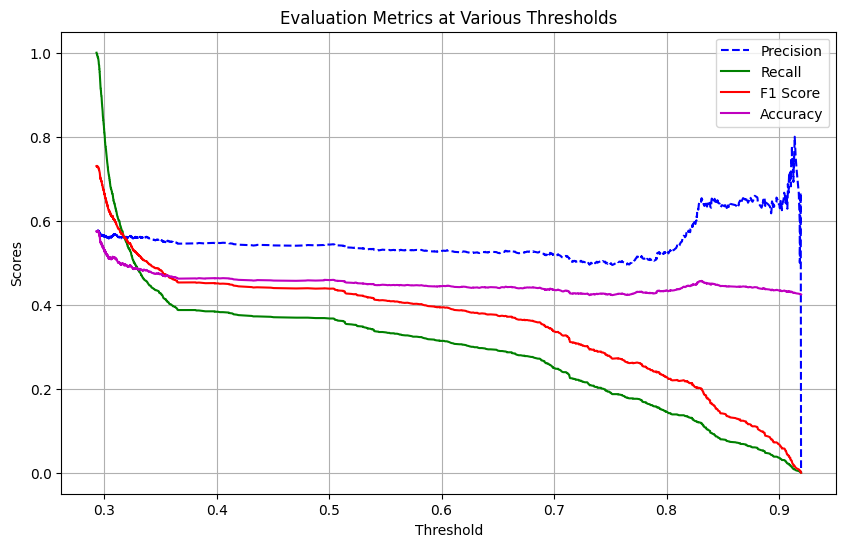

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test_10, y_prob)

accuracies = []

# Calculate F1 scores and accuracy for each threshold
f1_scores = []
for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    f1_scores.append(f1_score(y_test_10, y_pred))
    accuracies.append(accuracy_score(y_test_10, y_pred))

# Plotting the precision, recall, F1-score, and accuracy as functions of the threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores, 'r-', label='F1 Score')
plt.plot(thresholds, accuracies, 'm-', label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Scores')
plt.title('Evaluation Metrics at Various Thresholds')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
y_pred_binary = np.where(y_prob > 0.5, 1, 0)

# Print classification report

print('Classification Report:')
print(classification_report(y_test_10, y_pred_binary))

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.58      0.48       735
           1       0.54      0.37      0.44       994

    accuracy                           0.46      1729
   macro avg       0.47      0.47      0.46      1729
weighted avg       0.48      0.46      0.45      1729

